In [1]:
import os 
import numpy as np
import pandas as pd

from IPython.display import display

#### Formatting phenotype (She and Jarosz study)

In [2]:
phenotype_folder = '/home/savvy/PROJECTS/PHD/piQTL_project/reference_she_jarosz_gwas/data/inputs/subset/she_jarosz_phenotype'

ALL_TRAITS = []
for table in sorted(os.listdir(phenotype_folder)):
    for DRUG in ['5Fcytosine', 'Fluconazole', 'Methotrexate', 'Trifluoperazine']:
        if DRUG in table :
            TMP = pd.read_csv(f'{phenotype_folder}/{table}').rename(columns={"17.2":"17_2", "40.2":"40_2", "180.2":"180_2"})
            ALL_TRAITS.append(TMP.set_index('condition').T)

PHENOTYPE = pd.concat(ALL_TRAITS, axis=1)
PHENOTYPE = PHENOTYPE.reset_index().rename(columns={'index':'TAXA'})

In [41]:
display(PHENOTYPE)

condition,TAXA,30h-5Fcytosine,44h-5Fcytosine,72h-5Fcytosine,36h-Fluconazole,43h-Fluconazole,58h-Fluconazole,44h-Methotrexate,48h-Trifluoperazine,120h-Trifluoperazine,44h-Trifluoperazine,72h-Trifluoperazine,144h-Trifluoperazine
0,6,243.75,417.00,690.00,315.00,571.25,753.25,585.00,1039.00,736.750000,6.50,442.00,1131.25
1,7,256.50,436.50,684.75,320.25,582.50,741.50,731.75,1117.75,75.750000,28.50,639.50,1271.50
2,14,191.25,338.00,552.25,314.25,375.00,434.25,811.50,1025.50,314.000000,0.75,337.75,1015.75
3,15,315.25,504.25,725.00,18.00,257.50,471.50,806.00,1010.75,917.250000,67.50,829.25,1590.75
4,17,135.75,119.25,384.25,211.75,464.75,573.75,638.00,931.00,217.000000,4.00,170.75,592.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1065,242.75,374.75,561.75,425.75,616.25,767.50,800.50,1099.00,-1.000000,1.25,90.00,698.00
353,1069,350.25,756.00,1271.50,399.50,605.50,785.25,947.25,1113.50,585.666667,1.50,48.25,929.50
354,17_2,135.75,119.25,384.25,211.75,464.75,573.75,638.00,931.00,217.000000,4.00,170.75,592.25
355,40_2,230.00,337.50,490.50,212.50,501.50,603.75,741.25,970.50,465.500000,151.00,738.75,1241.00


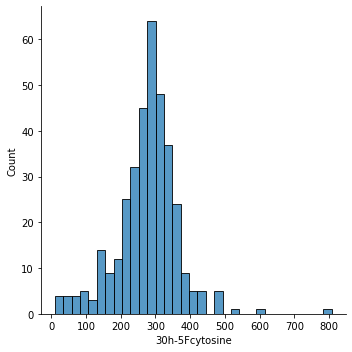

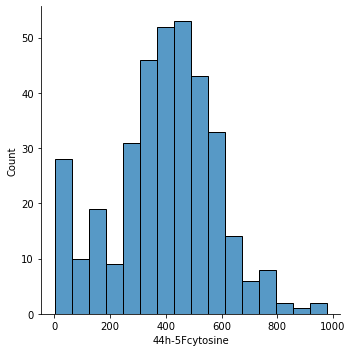

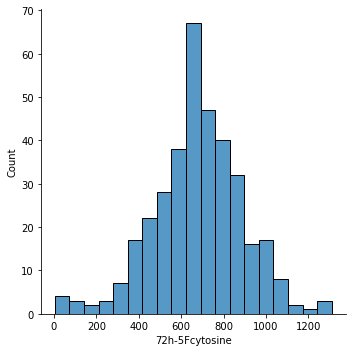

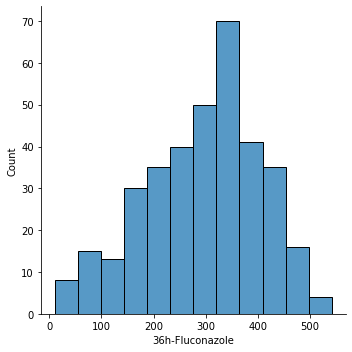

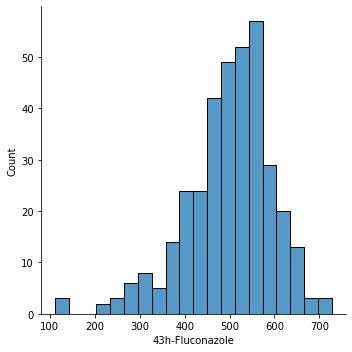

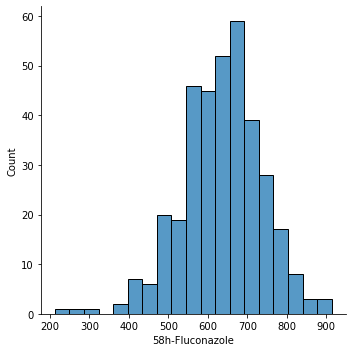

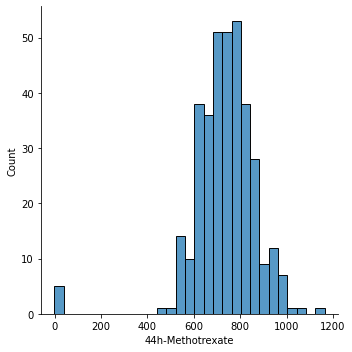

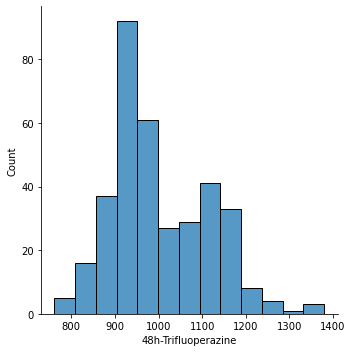

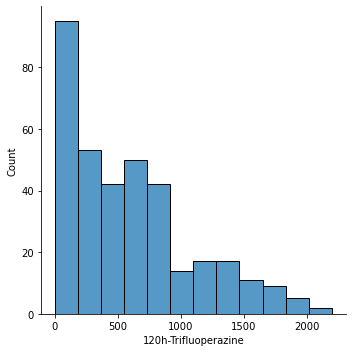

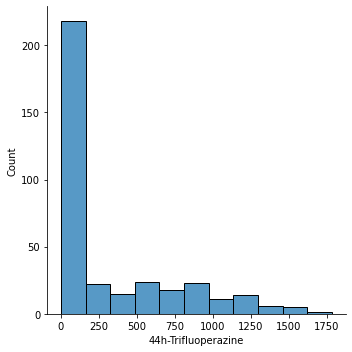

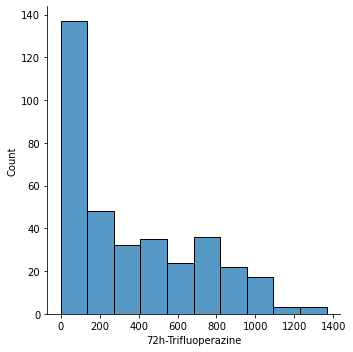

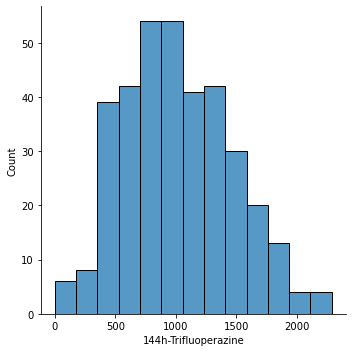

In [4]:
import seaborn as sns 

for col in PHENOTYPE.columns[1:]:
    sns.displot(PHENOTYPE[col])

In [43]:
PHENOTYPE.to_csv('../../data/rMVP/rMVP_pre_inputs/Phenotype_sj2018.txt', sep='\t', index=False)

#### Formatting genotype (removing SNPs with more than 5% of missing genotype)

In [8]:
genotype = pd.read_csv('../../data/genotype_information/piQTL_genotype_matrix_dec2022.txt').rename(columns={"17.2":"17_2", "40.2":"40_2", "180.2":"180_2"})
count_0 = []
for snp_id in genotype['snp_id']:
    count_0.append([snp_id, ((genotype[genotype['snp_id'] == snp_id].values == 0).sum() / 357) * 100])

# df_0 = pd.DataFrame(count_0, columns=['snp_id', 'missing_genotype'])
# no_NAs = list(df_0[df_0['missing_genotype'] <= 5]['snp_id'].values)
# genotype = genotype[genotype['snp_id'].isin(no_NAs)]
genotype = genotype.drop(columns='snp_id')
genotype.to_csv('../../data/genotype_information/rMVP/Genotype.txt', sep='\t', header=False, index=False)

In [135]:
savvy_met1 = genotype[genotype['snp_id'].isin(no_NAs)]

In [136]:
tatsuya_met2 = genotype[genotype['snp_id'].isin(tatsuya_noNAs)]

In [33]:
# GENOTYPE.to_csv('../../data/genotype_information/rMVP/Genotype_noNAs.txt', sep='\t', header=False, index=False)

In [4]:
snp_info = pd.read_csv('/home/savvy/PROJECTS/PHD/piQTL/data/genotype_information/snps_annotations_genome-version-3-64-1.txt').rename(columns={'snp_id':'SNP', 'chrom':'Chr', 'position':'Pos'})
SNP_MAP = snp_info[['SNP','Chr','Pos']]
SNP_MAP['Chr'] = [ SNP_MAP['Chr'][i].replace('CHR_','').replace('CHR','') for i in SNP_MAP.index ]
# SNP_MAP = SNP_MAP[SNP_MAP['SNP'].isin(no_NAs)]
SNP_MAP.to_csv('../../data/genotype_information/rMVP/Map.txt', sep='\t', index=False)

/tmp/ipykernel_91628/1432050893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNP_MAP['Chr'] = [ SNP_MAP['Chr'][i].replace('CHR_','').replace('CHR','') for i in SNP_MAP.index ]


In [5]:
display(SNP_MAP)

,SNP,Chr,Pos
0,1,1,1025
1,2,1,1035
2,3,1,1074
3,4,1,1470
4,5,1,1475
...,...,...,...
12049,12050,MT,74432
12050,12051,MT,74433
12051,12052,MT,77708
12052,12053,MT,84245


In [36]:
SNP_MAP.to_csv('../../data/genotype_information/rMVP/Map_noNAs.txt', sep='\t', index=False)

#### Checking valid SNPs from Savvy and Tatsuya's datasets

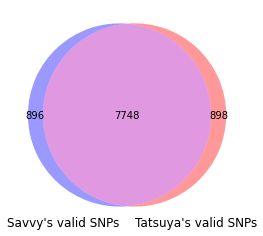

In [138]:
venn2(subsets=(set(savvy_met1['snp_id']), set(tatsuya_met2['snp_id'])), set_colors=('blue', 'red'), set_labels=("Savvy's valid SNPs", "Tatsuya's valid SNPs"))
plt.show()

In [155]:
differ_between_tatsuya_savvy = (set(set(savvy_met1['snp_id']) - set(tatsuya_met2['snp_id'])) | set(set(tatsuya_met2['snp_id']) - set(savvy_met1['snp_id'])))

In [161]:
met1 = df_0[df_0['snp_id'].isin(differ_between_tatsuya_savvy)]
met2 = tatsuya_missing_genotype[df_0['snp_id'].isin(differ_between_tatsuya_savvy)]

In [206]:
savvy_0 = []
for snp in differ_between_tatsuya_savvy :
    savvy_0.append([snp, (genotype[genotype['snp_id'] == snp ].values == 0).sum()])

savvy_snp_frq = pd.DataFrame(savvy_0, columns=['snp_id', '0'])
snps_frequency[['snp_id', '0']].merge(savvy_snp_frq, on='snp_id', suffixes=['_tatsuya', '_savvy'])

,snp_id,0_tatsuya,0_savvy
0,1253,60,8
1,1254,64,17
2,1255,133,7
3,1257,88,3
4,1258,15,37
...,...,...,...
1789,11044,280,7
1790,11045,346,9
1791,11046,186,8
1792,11047,256,13


In [219]:
snps_frequency

,snp_id,-1,0,1
0,1,127,119,108
1,2,125,124,105
2,3,125,229,0
3,4,127,227,0
4,5,188,136,30
...,...,...,...,...
12049,12050,207,6,141
12050,12051,264,36,54
12051,12052,5,312,37
12052,12053,30,285,39


In [218]:
snps_frequency[snps_frequency['snp_id'] == 1253]

,snp_id,-1,0,1
1252,1253,41,60,253


In [217]:
np.unique(genotype[genotype['snp_id'] == 1253].values[0][1:], return_counts=True)

(array([-1,  0,  1]), array([177,   8, 172]))

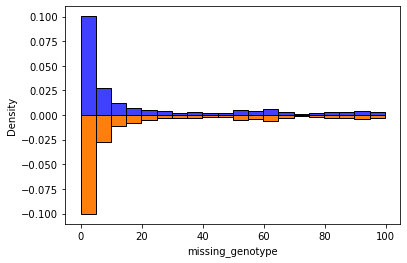

In [178]:
sns.histplot(met1['missing_genotype'], stat="density", color='blue', bins=20)

# plot histogram chart for var2
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(met2['0'], density=True, bins=n_bins) 
# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * 1

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')
plt.show()

___

In [13]:
f = open('../../data/genotype_information/snps_checking/savvy_valid_snps.txt', 'r')
savvy_snps = [int(line.strip()) for line in f.readlines() ]
f.close()

f = open('../../data/genotype_information/snps_checking/tatsuya_valid_snps.txt', 'r')
tatsuya_snps = [int(line.strip()) for line in f.readlines() ]
f.close()

In [132]:
snps_frequency = pd.read_csv('../../data/genotype_information/snps_checking/snp_type_frequency.csv')
tatsuya_missing_genotype = (snps_frequency[["-1","0","1"]] / 354) * 100
tatsuya_missing_genotype['snp_id'] = snps_frequency['snp_id'].astype(int)
tatsuya_noNAs = tatsuya_missing_genotype[tatsuya_missing_genotype["0"] <= 5]['snp_id']

In [80]:
import matplotlib.pyplot as plt 
from matplotlib_venn import venn2
import seaborn as sns

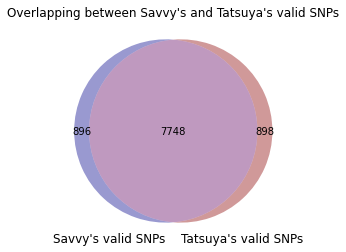

In [88]:
venn2(subsets=(set(no_NAs),set(tatsuya_noNAs)), set_labels=("Savvy's valid SNPs", "Tatsuya's valid SNPs"), set_colors=['darkblue', 'darkred'])
plt.title("Overlapping between Savvy's and Tatsuya's valid SNPs")
plt.show()

#### Genotype missing data (Savvy's method from dataframe & Tatsuya from snps frequency)

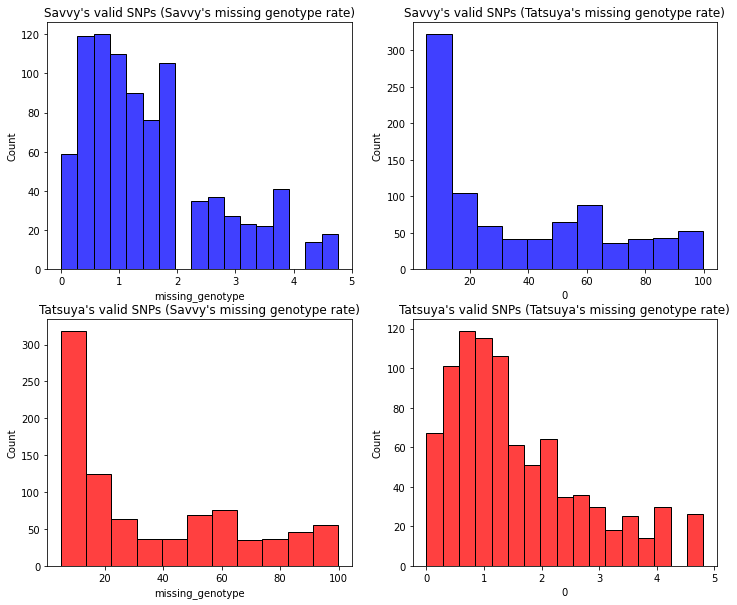

In [112]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

savvy_valid_snps_mg_met1 = df_0[df_0["snp_id"].isin(savvy_snps)]
sns.histplot(savvy_valid_snps_mg_met1["missing_genotype"], color='blue', ax=axes[0,0])
axes[0,0].set_title("Savvy's valid SNPs (Savvy's missing genotype rate)")

tatsuya_valid_snps_mg_met1 = df_0[df_0["snp_id"].isin(tatsuya_snps)]
sns.histplot(tatsuya_valid_snps_mg_met1["missing_genotype"], color='red', ax=axes[1,0])
axes[1,0].set_title("Tatsuya's valid SNPs (Savvy's missing genotype rate)")



savvy_valid_snps_mg_met2 = tatsuya_missing_genotype[tatsuya_missing_genotype["snp_id"].isin(savvy_snps)]
sns.histplot(savvy_valid_snps_mg_met2["0"], color='blue', ax=axes[0,1])
axes[0,1].set_title("Savvy's valid SNPs (Tatsuya's missing genotype rate)")

tatsuya_valid_snps_mg_met2 = tatsuya_missing_genotype[tatsuya_missing_genotype["snp_id"].isin(tatsuya_snps)]
sns.histplot(tatsuya_valid_snps_mg_met2["0"], color='red', ax=axes[1,1])
axes[1,1].set_title("Tatsuya's valid SNPs (Tatsuya's missing genotype rate)")
plt.show()

In [221]:
tatsuya_genotype_matrix = pd.read_csv('../../data/genotype_information/snps_checking/genotype_matrix_piQTL.csv')

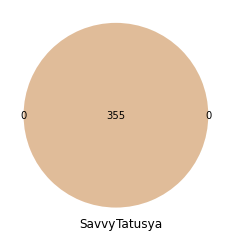

In [228]:
venn2(subsets=(set(genotype.columns[:-3]), set(tatsuya_genotype_matrix.columns)), set_labels=('Savvy', 'Tatusya'))

#### Test on a good SNPs

In [235]:
np.unique(genotype[genotype['snp_id'] == 8][genotype.columns[:-3]], return_counts=True)

(array([-1,  0,  1,  8]), array([123,   9, 222,   1]))

In [234]:
np.unique(tatsuya_genotype_matrix[tatsuya_genotype_matrix['snp_id'] == 8], return_counts=True)

(array([-1,  0,  1,  8]), array([123,   9, 222,   1]))

#### Test on a bad SNPs

In [236]:
np.unique(genotype[genotype['snp_id'] == 1253][genotype.columns[:-3]], return_counts=True)

(array([  -1,    0,    1, 1253]), array([175,   8, 171,   1]))

In [237]:
np.unique(tatsuya_genotype_matrix[tatsuya_genotype_matrix['snp_id'] == 1253], return_counts=True)

(array([  -1,    0,    1, 1253]), array([ 41,  60, 253,   1]))

In [284]:
she_jarosz_genotype = pd.read_csv('../../data/genotype_information/piQTL_genotype_matrix_dec2022_from_pipeline.txt')

In [285]:
she_jarosz_genotype

,snp_id,6,7,14,15,17,20,22,27,29,...,1038,1040,1046,1050,1052,1065,1069,17_2,40_2,180_2
0,1,1,0,1,0,1,0,1,-1,0,...,-1,-1,-1,-1,-1,-1,0,1,1,-1
1,2,1,1,-1,-1,1,0,1,-1,-1,...,-1,0,0,-1,0,0,0,1,1,-1
2,3,0,0,-1,-1,0,-1,0,0,0,...,-1,0,0,-1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,-1,-1,0,0,0
4,5,-1,-1,-1,-1,-1,1,-1,-1,-1,...,1,0,-1,0,0,1,-1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12049,12050,1,1,1,-1,-1,1,-1,1,-1,...,-1,-1,-1,-1,1,1,0,-1,1,-1
12050,12051,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,1,-1,1,0,0,-1
12051,12052,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12052,12053,1,0,1,0,0,-1,-1,0,-1,...,0,0,0,0,0,1,0,0,0,0


In [286]:
np.unique(she_jarosz_genotype[she_jarosz_genotype['snp_id'] == 8][she_jarosz_genotype.columns[:-3]], return_counts=True)

(array([-1,  0,  1,  8]), array([123,   9, 222,   1]))

In [287]:
np.unique(she_jarosz_genotype[she_jarosz_genotype['snp_id'] == 1253][she_jarosz_genotype.columns[:-3]], return_counts=True)

(array([  -1,    0,    1, 1253]), array([ 41,  60, 253,   1]))

In [249]:
from scipy.io import loadmat

In [250]:
original_genotype_matrix = loadmat('../../data/genotype_information/original_she_jarosz_2018/phasedGenotype.mat')

In [289]:
pd.DataFrame(original_genotype_matrix['phasedGenotype'])

,0,1,2,3,4,5,6,7,8,9,...,12044,12045,12046,12047,12048,12049,12050,12051,12052,12053
0,1,1,0,0,1,1,0,1,1,0,...,-1,1,0,0,0,-1,0,1,0,0
1,0,1,0,0,-1,-1,0,1,1,0,...,-1,1,-1,0,1,1,0,0,0,0
2,0,1,0,0,1,0,0,1,1,0,...,1,0,-1,0,0,1,0,0,0,0
3,-1,-1,-1,0,-1,-1,0,-1,-1,0,...,-1,0,-1,0,0,-1,0,0,0,0
4,0,-1,-1,0,0,0,0,1,1,0,...,-1,0,0,0,0,-1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1,0,0,-1,-1,-1,0,-1,-1,0,...,-1,0,0,1,0,-1,-1,0,1,1
1148,-1,-1,0,0,0,0,0,1,1,0,...,1,0,0,0,1,-1,-1,0,0,0
1149,0,0,0,0,0,0,0,1,1,0,...,1,0,0,1,1,-1,-1,0,0,0
1150,0,0,0,-1,-1,-1,0,1,1,0,...,1,0,-1,0,1,-1,-1,0,0,0


In [258]:
july_barcoded_strain_table = pd.read_csv('../../data/pipeline/barcode_collection.csv')
barcoded_strains = list(july_barcoded_strain_table['strain_number'])

In [269]:
# genotype_table.to_csv('../../data/genotype_information/piQTL_genotype_matrix_dec2022_from_piline.txt', index=False)

In [267]:
np.unique(genotype_table[genotype_table['snp_id'] == 8], return_counts=True)

(array([-1,  0,  1,  8]), array([123,   9, 222,   1]))

In [265]:
genotype_table = pd.DataFrame(original_genotype_matrix['phasedGenotype'])
genotype_table = genotype_table.astype(int)
# #### Adding strain_ids
genotype_table['snp_id'] = [ x+1 for x in range(len(original_genotype_matrix['phasedGenotype']))]
# #### Transposing table and removing the line used for adding strain_ids as columns names
genotype_table = genotype_table.T.reset_index(drop=True)
genotype_table
genotype_table.columns = genotype_table.iloc[12054]
cols = list(np.unique(barcoded_strains))
genotype_table = genotype_table[cols]
genotype_table
genotype_table = genotype_table.drop(12054)
genotype_table.columns = genotype_table.columns.astype(str)
genotype_table =  genotype_table.reset_index().rename(columns={'index':'snp_id'})
genotype_table['snp_id'] = genotype_table['snp_id'] + 1
# #### Adding duplicated strains 
genotype_table['17_2'] = genotype_table['17']
genotype_table['40_2'] = genotype_table['40']
genotype_table['180_2'] = genotype_table['180']

In [268]:
np.unique(genotype_table[genotype_table['snp_id'] == 1253], return_counts=True)

(array([  -1,    0,    1, 1253]), array([ 41,  60, 253,   1]))